## Шаг 1. Исходная информация о файле
* Импортируем необходимые библиотеки, прочитаем исходный файл 
## Шаг 2. Подготовка данных
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
## Шаг 3. Исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**
## Шаг 4. Портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
## Шаг 5. Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.
Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.
## Шаг 6. Общий вывод по проекту

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Исходная информация о файле

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#установим лимит отображения строк и колонок
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('games.csv')
data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
422,Halo: The Master Chief Collection,XOne,2014.0,Shooter,1.91,1.00,0.03,0.29,85.0,7.2,M
12230,Worms 3D,GC,2003.0,Strategy,0.05,0.01,0.00,0.00,69.0,7.6,T
1211,BioShock 2,PS3,2010.0,Shooter,0.85,0.46,0.02,0.22,88.0,8.2,M
13797,Zen-Nippon GT Senshuken,SNES,1995.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3799,SpongeBob SquarePants featuring Nicktoons: Glo...,Wii,2008.0,Action,0.49,0.00,0.00,0.04,47.0,5.4,E
3885,Spectrobes: Beyond the Portals,DS,2008.0,Role-Playing,0.36,0.11,0.00,0.04,70.0,7.7,E10+
8534,DS Rakubiki Jiten,DS,2005.0,Misc,0.00,0.00,0.16,0.00,NaN,NaN,NaN
11614,P.N.03 - Product Number Three,GC,2003.0,Shooter,0.06,0.02,0.00,0.00,NaN,NaN,NaN
2030,Dance on Broadway,Wii,2010.0,Misc,0.25,0.65,0.00,0.12,48.0,3.3,E10+
16359,Captain Morgane and the Golden Turtle,Wii,2012.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,NaN


## Шаг 2. Подготова данных

In [4]:
#переведем названия строк в нижнемий регистр, в остальном названия соответсвуют принятому стандарту 
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#посмотрим на общую информацию о файле, типы данных, и наличие пропусков
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

По ифнормации о файле мы видим, что файл содержит **16.7 тыс строк**.
В колонках **name, year_of_release, genre, critic_score, user_score, rating** имеются **пропуски**. 

Отметим также, что пропуски в колонках **name, year_of_release, genre** составляют порядка **1.6%** от общих данных, можем **принебречь** этими данными.  

In [46]:
data = data.dropna(subset = ['name', 'year_of_release', 'genre'])
#проверим результат
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [47]:
# Из информации о файле можем видеть, что колонка year_of_release имеет тип данных float64, изменим на целочисленное int
data['year_of_release'] = data['year_of_release'].astype('Int64')
#проверим результат
data['year_of_release'].info()

<class 'pandas.core.series.Series'>
Int64Index: 16444 entries, 0 to 16714
Series name: year_of_release
Non-Null Count  Dtype
--------------  -----
16444 non-null  Int64
dtypes: Int64(1)
memory usage: 273.0 KB


In [48]:
# Также сомнения вызывает колонка user_score, рассмаотрим подробнее значения в ней чтобы оценить тип данных. 
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [49]:
#можем заметить и nan и 'tbd' - вероятнее всего 'tbd' значит to be determined, что переводится как будет определено позже, заменим на nan
data = data.replace({'user_score':{'tbd':np.nan}})
#check
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [50]:
#после чего поменяем тип данных на float64
data['user_score'] = data['user_score'].astype('float64')
#check
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [51]:
#Посчитаем суммарные продажи во всех регионах
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data[['name','na_sales','eu_sales','jp_sales','other_sales','total_sales']].sample(10)

,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
10350,Saigo no Yakusoku no Monogatari,0.00,0.00,0.11,0.00,0.11
13642,Star Ocean 5: Integrity and Faithlessness,0.00,0.00,0.04,0.00,0.04
168,Pokemon Stadium,3.18,1.24,0.94,0.09,5.45
9898,Legends of Wrestling II,0.09,0.02,0.00,0.00,0.11
13563,D.C.F.S.: Da Capo Four Seasons,0.00,0.00,0.04,0.00,0.04
5141,Wanted: Weapons of Fate,0.17,0.15,0.00,0.04,0.36
9852,Tony Hawk's Pro Skater 5,0.09,0.02,0.00,0.01,0.12
4173,NBA Ballers: Phenom,0.23,0.18,0.00,0.06,0.47
756,Star Wars: Rogue Squadron,1.60,0.46,0.08,0.03,2.17
6877,Etrian Mystery Dungeon,0.09,0.01,0.13,0.01,0.24


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'total_sales'}>, <AxesSubplot:>]],
      dtype=object)

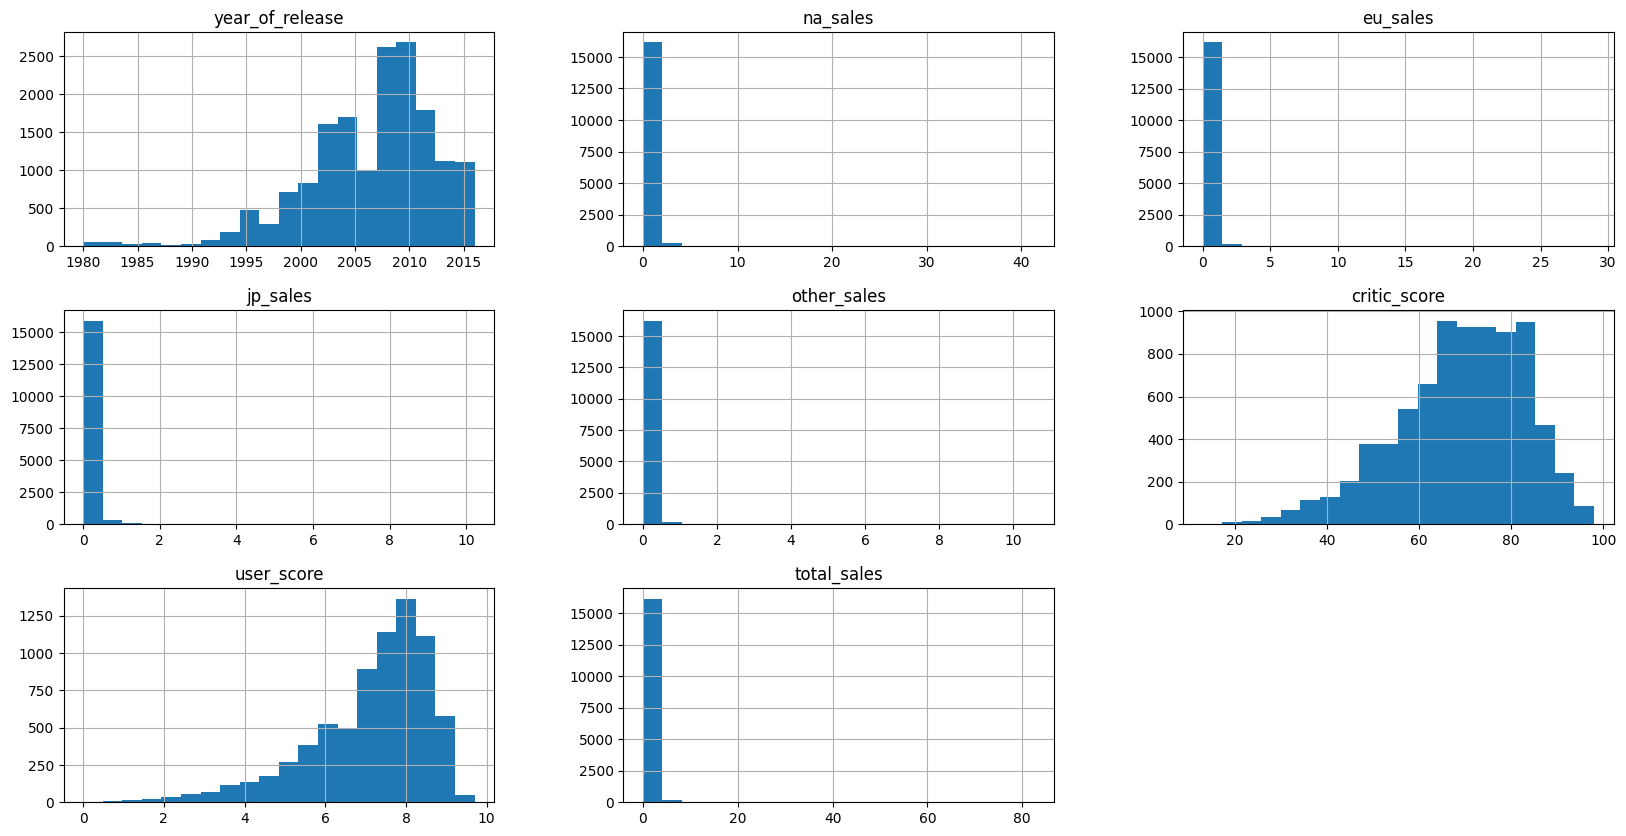

In [52]:
#построим общую гистограмму для всех столбцов таблицы. 
data.hist(figsize=(20, 10), bins=20)

In [53]:
#также вызовем числовое описание данных для наглядности определения выбросов.
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### Обработка пропусков и причины их возникновения

При анализе датасета мы выявили пропуски в ячейках **name, year_of_release, genre**, которые составляют порядка **1.6%** от общих данных датасета. 
Такой объем данных является несущественным и им можно принебречь, мы не стали заполнять пропуски в колонке **year_of_release** на основании данных датасета по играм с аналогичным названием и жанром, вводу того что локализация игр в других регионах может занимать годы, и происходит с лагом времени. 
Также к появлению пропусков в данных ячейках могли привести ошибки интеграции с источником данных при формировании сводного датасета или человеческий фактор. 

Мы обнаружили огромное количество пропусков в рейтигах **critic_score, user_score, rating**. 
Можем предположить, что данные пропуски могут быть связаны со следующими факторами:
* централизованная **оценка могла начать существовать с определенного года**
* рейтинговое агентство **ESRB** было создано для оценки игр **на территории США и Канады**, и, вероятно разработчики игр из европы и Японии могут не стремиться получать данные рейтинги (данные в колонке rating). 
* также нельзя исключать **ошибки интеграции** с источником данных при формировании сводного датасета или **человеческий фактор**. 


## Шаг 3. Исследовательский анализ данных

Мы можем наблюдать **большое количество пропусков в колонках рейтингов**.

проверим **предположение**, что такое большое количество пропусков в рейтингах связано с тем что централизованная **оценка могла начать существовать с определенного года**. 

Для этого **построим гистограммы** по пропускам и строкам с данными. 

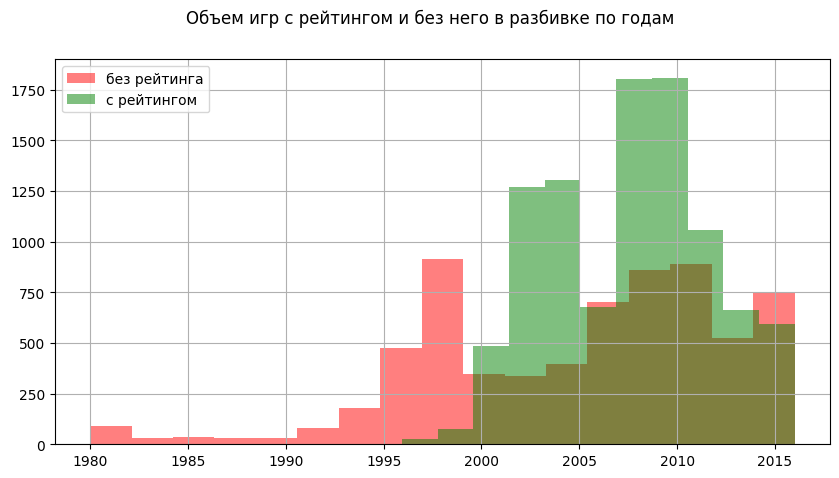

In [54]:
#bins=len(data['year_of_release'].unique())
data.query('rating.isna()')['year_of_release'].hist(alpha=0.5, color='red', figsize=(10, 5), bins=17)
data.query('~rating.isna()')['year_of_release'].hist(alpha=0.5, color='green', figsize=(10, 5), bins=17)
plt.suptitle("Объем игр с рейтингом и без него в разбивке по годам")
plt.legend(['без рейтинга', 'с рейтингом'])

Предположение отчасти подтвердилось, **до 1996 года нет данных о рейтингах**, но при этом есть отсутствующие значения. Можно подтвердить предположение о том, что **рейтинги до 1996 года не присваивались**.

После 2000 года, можем видеть **заметный рост записей с рейтингами**, вероятнее всего прмерно в это время **начали появляться** в связи с массовым распространением интернета и печатной продукции, **рейтинговые сервисы**. 

Но также на периоде после 2000 года можем наблюдать записи без рейтинга, которые составляют значительную долю от числа записей с присвоенными рейтингами. 
Вероятнее всего это связано с тем, что после 1995 года на фоне роста игровой индустрии и выпуска большого количества игр, некоторые **игры** просто **не оцениваются** и выпадают из поля зрения рейтинговых сервисов, также это могут быть нишевые продукты с малой аудиторией или игры низкого качества. 

Text(0.5, 0.98, 'Объщий объем выпущенных игр по годам')

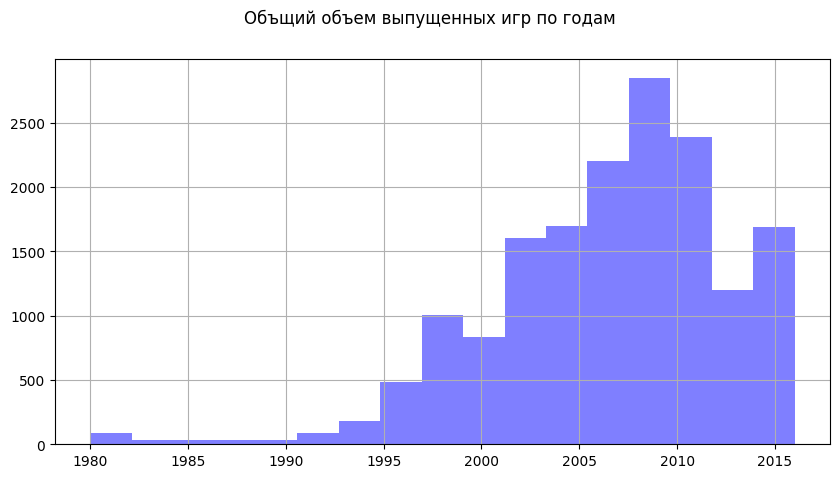

In [55]:
data['year_of_release'].hist(alpha=0.5, color='blue', figsize=(10, 5), bins=17)
plt.suptitle("Объщий объем выпущенных игр по годам")

Также по графику можно сделать вывод, что анализ данных целесообразно проводить начиная с 95 года, до 95 игровая индустрия только-только зарождалась, выпускалось незначительное количество игр и их рейтинги отсутствуют. 
Возможно эту границу можно сдвинуть еще дальше до 2000, вернемся к этому вопросу чуть позже. 

In [56]:
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(7)
sales_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


In [57]:
#создадим словарь для последующего использования при построении графика 
top_7_platforms = sales_by_platform.reset_index()['platform']
top_7_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
Name: platform, dtype: object

In [58]:
#подготовим табличку для построения графикво:
platforms = data.query('platform in @top_7_platforms')[['year_of_release' , 'platform']].groupby('platform')

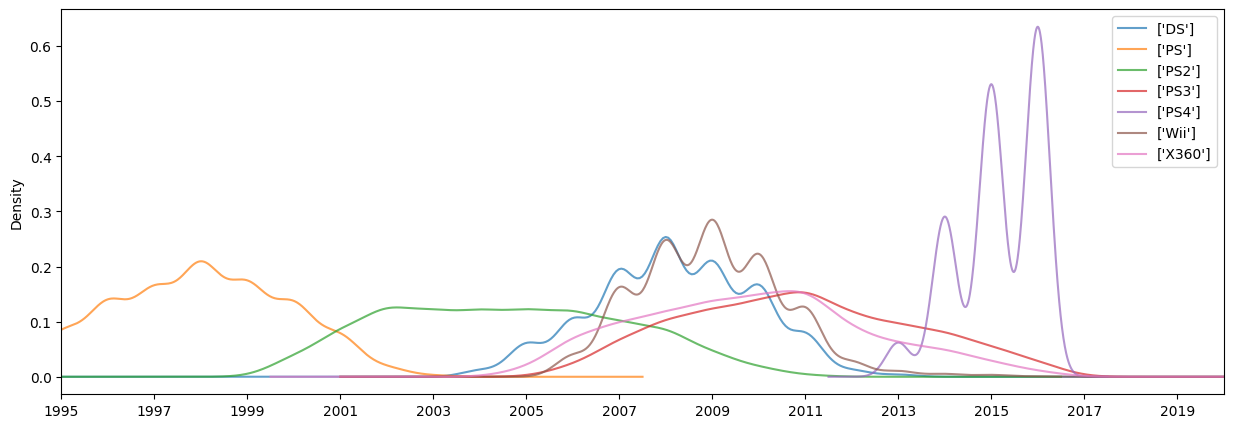

In [59]:
# построим графики по top_7_platforms:
for platform, platforms_df in platforms:
    df = platforms.get_group(platform) 
    df['year_of_release'].plot(
        kind = 'density', 
        figsize = (15,5),
        alpha = 0.7, 
        xlim = (1995, 2020), 
        legend = True, 
        )
    plt.legend(platforms['platform'].unique())
    plt.xticks(np.arange(1995, 2020, step=2))


На основании графика можно сделать вывод, что **жизненый цикл** платформы составляет примерно **10 лет**. 

В выборку включены 7 лидеров по продажам для того чтобы захватить **проекты, находящиеся на разных стадиях жизненного цикла**:
* Проект **PS** практически прекратил свое существование к 2003 году, а на смену ему компания SONY запустила проект **PS2** в 2000 году, после чего в 2006 проект **PS3**, а начиная с 2013 года проект **PS4** - тем самым обеспечив себя проектами на разных стадиях жизненного цикла. 
* также мы знаем, что проекты **PS3** и **X360** это проекты одного поколения и должны иметь примерно одинаковые жизненные циклы - что подтверждается на графике. 
* Также видим резкий спад по плотности проекта **PS4** связано это с тем, что в нашем датасете данные представлены до 2017 года, но проект находится в активной стадии жизненного цикла и имеет феноменальную популярность по состоянию на 2017 год. 

***Исходя из вывода о среднем жизненном цикле проекта в 10 лет, офильтруем исходный датасет по дате выхода начиная с 2012 года и поместим его в переменную data_2012***

In [89]:
#отфильтруем датасет и поместим в переменную data_2012, в последующем будем использовать уже отфильтрованный датасет. 
data_2012 = data.query('year_of_release > 2012')
data_2012.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
927,Madden NFL 25,PS3,2013,Sports,1.60,0.03,0.00,0.24,76.0,4.1,E,1.87
7755,Bound By Flame,PS4,2014,Role-Playing,0.08,0.09,0.00,0.03,53.0,5.9,M,0.20
16362,Crows: Burning Edge,PS4,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
15376,Back to the Future: The Game,X360,2015,Adventure,0.02,0.00,0.00,0.00,NaN,7.5,NaN,0.02
5072,Farming Simulator 2015,PS3,2015,Simulation,0.11,0.20,0.00,0.06,NaN,NaN,NaN,0.37
3127,Borderlands 2,PSV,2014,Shooter,0.32,0.16,0.01,0.15,64.0,7.6,M,0.64
9198,Rayman Legends,PSV,2014,Platform,0.01,0.10,0.00,0.03,87.0,8.4,E10+,0.14
13168,Winning Post 7 2013,PS3,2013,Sports,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
14799,MX vs. ATV Supercross,PS3,2014,Racing,0.02,0.01,0.00,0.00,58.0,3.5,E,0.03


In [90]:
sales_by_platform_2012 = data_2012.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
sales_by_platform_2012

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


In [91]:
#создадим словарь для последующего использования при построении графика 
perspective_platforms = sales_by_platform_2012.reset_index()['platform']

In [92]:
#оценим данные на выбросы
data_2012.query('platform in @perspective_platforms')['total_sales'].describe()

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

Text(0.5, 0.98, 'Диаграммы ящик с усами по объему продаж')

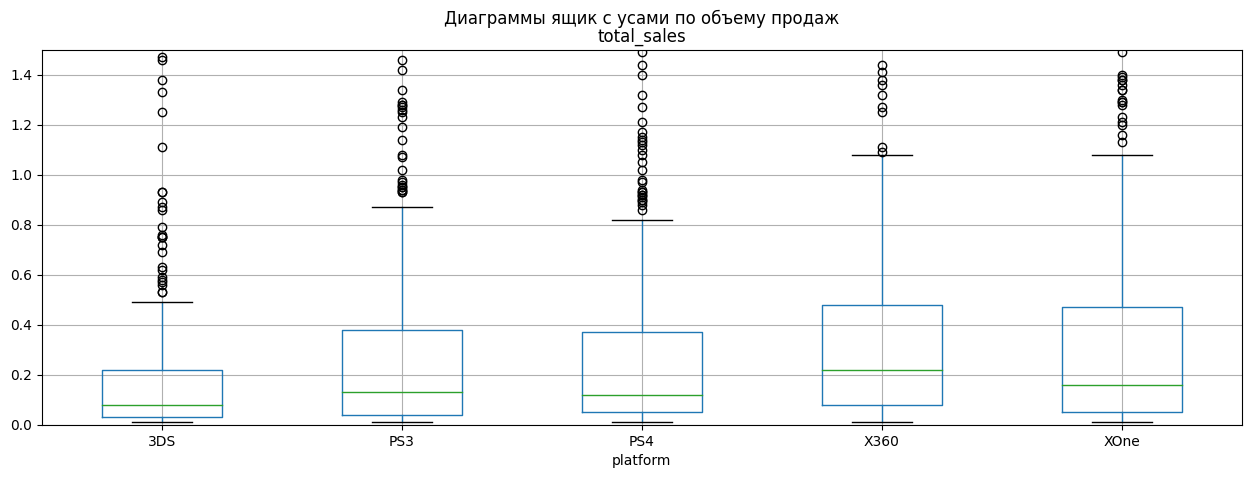

In [93]:
#для построения диаграммы ящика с усами почистим данные от выбросов, примем пороговое значение total_sales = 1.5
data_2012.query('platform in @perspective_platforms & total_sales <1.5').boxplot(column="total_sales", by="platform", figsize = (15,5))
plt.ylim(0,1.5)
plt.suptitle("Диаграммы ящик с усами по объему продаж")

Из построенной диаграммы можем сделать вывод, что медиана среди 4 лидеров выборки отличается не сильно, показатели объема продаж чуть выше у Microsoft по сравнению с SONY. 

Представитель мобильной платформы Nintendo 3DS отличается более низкими показателями медианы объема продаж, что соответствует действительности. 

In [25]:
#Посчитаем коэффициенты корреляции, для примера возьмем данные по платформе Play Station 3
data_2012.query('platform == "PS3" & ~critic_score.isna() & ~user_score.isna()').corr()[['critic_score','user_score']]

,critic_score,user_score
year_of_release,-0.183762,-0.114822
na_sales,0.334401,0.008990
eu_sales,0.309752,0.000013
jp_sales,0.297450,0.215037
other_sales,0.315898,0.029920
critic_score,1.000000,0.599920
user_score,0.599920,1.000000
total_sales,0.333807,0.022691


(0.0, 10.0)

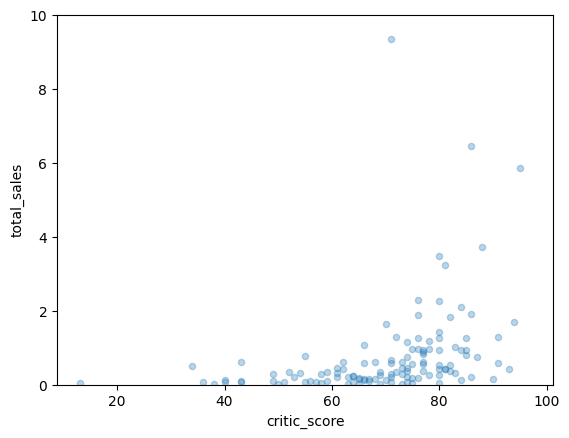

In [26]:
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
data_2012.query('platform == "PS3" & ~critic_score.isna()').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.ylim(0,10)

По коэффициентам из таблицы видно, что **зависимость между оценкой критиков и общим объемом продаж, не значительная** с коэффициентом 0.33, а **зависимость продаж от оценок пользователей и вове отсутствует**. 

Построенная **диаграмма** рассеяния **подтверждает выводы по табличным данным**. 

Для **подтверждения выводов** на основе продаж на платформе SONY PS3 оценим коэффициенты корреляции **по ближайшему конкуренту** от Microsoft X360. 

In [27]:
data_2012.query('platform == "X360" & ~critic_score.isna() & ~user_score.isna()').corr()[['critic_score','user_score']]

,critic_score,user_score
year_of_release,-0.245439,-0.074927
na_sales,0.342724,-0.007707
eu_sales,0.336418,-0.002450
jp_sales,0.290613,0.074947
other_sales,0.349204,-0.012678
critic_score,1.000000,0.520946
user_score,0.520946,1.000000
total_sales,0.350345,-0.006238


(0.0, 10.0)

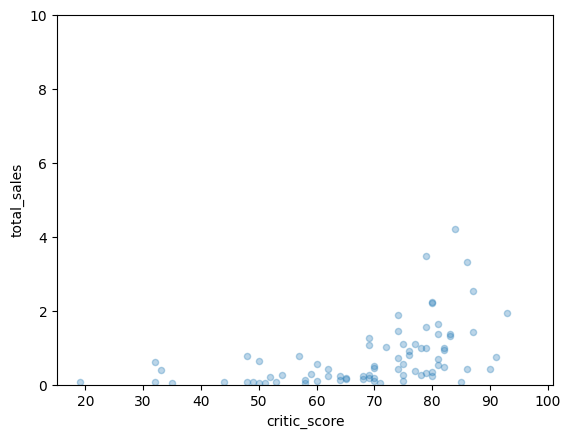

In [94]:
#Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
data_2012.query('platform == "X360" & ~critic_score.isna()').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.ylim(0,10)

Корреляция аналогична данным конкурентной платформы. 

In [97]:
#Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
data_2012.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)


,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


Для анализа распределения игр по жанрам возьмем **медианное значение по общему объему продаж**, медиана более устойчива к выбросам и поможет нам сформировать более объективную картину, так как за большим объемом продаж могут скрываться крупные бестселлеры и много мелких позиций. 
При анализе распределения игр по жанрам, **Шутеры, Спортивные игры и Платформеры** являются наиболее **популярными**. 
Аутсайдерами рейтинга являются Эдвенчеры и Пазлы. 

## Шаг 4. Портрет пользователя каждого региона

In [29]:
#построим сводные таблицы для каждого региона в разбивке по платформе и продажам
data_2012.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [30]:
data_2012.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [31]:
data_2012.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


При анализе **наиболее популярных платформ по регионам** лидеры продаж в Северной Америке и Европейском регионе **одинаковы**, исторические консоли от Майкрософт пользуются большей популярностью в Америке **ввиду политики эксклюзивных тайтлов** таких как HALO и Gears of War которые являются эксклюзивами для консолей XOne и X360. 

Картина **Японского рынка значительно отличается** от Европы и Америки, большее предпочтение отдается консолям **Nintendo и SONY**, это также связано с политикой эксклюзивных тайтлов а также **жанровых предпочтений Японского региона**, которые мы рассмотрим далее. 

In [32]:
#построим аналогичные сводные таблицы только с группировкой по жанрам
data_2012.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [33]:
data_2012.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [34]:
data_2012.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Также как и в случае с группировкой по платформам **вкусовые предпочтения в Северной Америке и Европе практически идентичны**, различаются только пятой позицией в рейтинге это игры прочего жарна и гонки соответственно. 

**Картина Японского рынка** традиционно значительно **отличается**, Японцы отдают предпочтение **RPG** (вероятнее всего это **JRPG**, критики традиционно выделяют японские RPG в отдельный жанр), **Платформерам, Играм прочего жарна, Файтингам и Шутерам**. 

**Топ5** жанров японского рынка **очень показателен** и объясняется закрытостью и **самобытностью японской игровой индустрии** для локальной аудитории, исторически существует огромное количество игр выпущенных только для японских консолей и **не локализованных на других языках**. 


### Посмотрим влияние рейтинга ESRB на продажи в отдельном регионе. 

C:\Users\Andrew\AppData\Local\Temp\ipykernel_12800\166315791.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_2012.groupby('rating')['na_sales','eu_sales','jp_sales'].agg('sum').plot(kind='bar')


<AxesSubplot:xlabel='rating'>

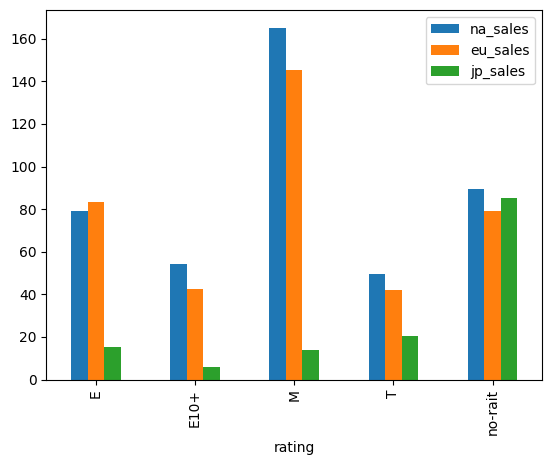

In [100]:
#мы знаем что у нас в файле большое количество пропусков в колонке rating, поэтому чтобы не упустить эти значения при построении графика замеинм их на no-rait
data_2012 = data_2012.replace({'rating':{np.nan:'no-rait'}})
data_2012.groupby('rating')['na_sales','eu_sales','jp_sales'].agg('sum').plot(kind='bar')

На основании графика можно сделать вывод, что продажи по рейтингам в разных регионах **пропорциональны**, рынок **Северной Америки и Европы составляют большую часть объема продаж**, с небольшим перевесом лидирует Северная Америка, **рынок Японии имеет значительно меньшие объемы**. 

Продажи по рейтингам распределены относительно равномерно, но можно заметить **интересные особенности**, например при общей тенденции лидерства рынка Северной Америки в общем объеме продаж, **европейский рынок** в сегменте игр для всех возрастных категорий (**рейтинг E**) **опережает Северную Америку**. Также **для Японского рынка** характерна **более высокая доля** рынка игр для **подростков** (рейтинг T, дети от 13 и старше). 

Также мы можем видеть, что **игры без рейтинга ESRB одинаково хорошо продаются во всех регионах**, не смотря на его отсутствие. 

### Шаг 5. Проверка гипотез

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем гипотезы:

**Нулевая гипотеза:** Средние пользовательские **рейтинги** платформ Xbox One и PC **одинаковые**;

**Альтернативная гипотеза:** Средние пользовательские **рейтинги** платформ Xbox One и PC **различаются**. 

In [109]:
#подготовим два массива данных с пользовательскими рейтингами по платформам
ur_xone = data_2012.query('platform == "XOne"').dropna(subset = ['user_score']).reset_index()
ur_xone = ur_xone['user_score']
ur_xone.sample(10)

44     7.4
23     7.5
109    7.0
171    8.1
127    2.1
22     6.3
60     5.9
117    7.5
128    8.2
176    7.1
Name: user_score, dtype: float64

In [107]:
ur_pc = data_2012.query('platform == "PC"').dropna(subset = ['user_score']).reset_index()
ur_pc = ur_pc['user_score']
ur_pc.sample(10)

20     5.9
82     8.0
120    8.7
126    6.1
112    6.2
129    7.8
26     4.6
73     7.3
70     7.0
6      5.7
Name: user_score, dtype: float64

In [108]:
len(ur_pc)

155

In [38]:
from scipy import stats as st

# критический уровень статистической значимости
alpha = 0.05

# проверим гипотезу о равенстве средних двух независимых совокупностей
results_1 = st.ttest_ind(ur_xone, ur_pc)

print('p-value:', results_1.pvalue)

# если p-value окажется меньше alpha - отвергнем гипотезу
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


### Вывод:

Для предположения мы использовали *гипотезу о равенстве средних двух генеральных совокупностей*.

Так как наши генеральные совокупности не зависят друг от друга, а также имеют достаточный размер и соответственно нормально распределены, мы можем использовать **Т-тест Стьюдента**. 

Мы применили метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: **st.ttest_ind**

Данные предоставляют достаточное основание, что для выбранного уровня значимости у нас не получилось отвергнуть нулевую гипотезу. 

Значит, можно сделать вывод, что средние пользовательские **рейтинги** платформ Xbox One и PC **одинаковые**;


**Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.**

Сформулируем гипотезы:

**Нулевая гипотеза:** Средние пользовательские **рейтинги** жанров Action и Sports **одинаковые**;

**Альтернативная гипотеза:** Средние пользовательские **рейтинги** жанров Action и Sports **различаются**.

In [102]:
#подготовим два массива данных с пользовательскими рейтингами по выбранным
ur_action = data_2012.query('genre == "Action"').dropna(subset = ['user_score']).reset_index()
ur_action = ur_action['user_score']
ur_action.sample(10)

267    5.5
316    7.0
364    7.6
138    8.5
78     7.3
13     6.8
255    8.6
228    5.7
125    7.2
277    6.8
Name: user_score, dtype: float64

In [103]:
len(ur_action)

389

In [105]:
ur_sports = data_2012.query('genre == "Sports"').dropna(subset = ['user_score']).reset_index()
ur_sports = ur_sports['user_score']
ur_sports.sample(10)

65     3.1
76     2.4
17     5.6
48     6.2
116    2.0
139    6.1
147    3.9
54     7.8
92     3.8
144    5.1
Name: user_score, dtype: float64

In [106]:
len(ur_sports)

160

In [41]:
# Проверим гипотезу о равенстве средних двух независимых совокупностей

# критический уровень статистической значимости
alpha = 0.05

results_2 = st.ttest_ind(ur_action, ur_sports)

print('p-value:', results_2.pvalue)

#  сравнение  получившееся p-значение с заданным уровнем статистической значимости):
if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


### Вывод:

Для предположения мы использовали *гипотезу о равенстве средних двух генеральных совокупностей*.

Так как наши генеральные совокупности не зависят друг от друга, а также имеют достаточный размер и соответственно нормально распределены, мы можем использовать **Т-тест Стьюдента**. 

Мы применили метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: **st.ttest_ind**

Данные предоставляют достаточное основание, что для выбранного уровня значимости мы можем отвергнуть нулевую гипотезу. 

Значит, можно сделать вывод, что средние пользовательские **рейтинги** жанров Action и Sports **различаются**.


## Шаг 6. Общий вывод по проекту

В ходе исследования был проанализирован **исходный файл**, содержащий исторические **данные о продажах игр** в разбивке по платформам, году выхода, жанру и рейтингам. 

Файл состоит из **16.7 тыс строк** в **12 колонках**. 

Колонки **name, year_of_release, genre, critic_score, user_score, rating** содержали **пропуски**. 

Пропуски в колонках **name, year_of_release, genre** составляли порядка **1.6%** от общих данных - эти строки мы удалили. 

В ходе исследования было обнаружено **большое количество пропусков в колонках рейтингов**. 
На основе анализа данных по годам, было определено, что **рейтинги до 1996 года не присваивались**, а **пропуски** в рейтингах **после 2000х** вероятно связаны с тем, что **некоторые игры** просто **не оцениваются** и выпадают из поля зрения рейтинговых сервисов, также это могут быть нишевые продукты с малой аудиторией или игры низкого качества. 

В ходе исследования мы опеределили, что **жизненный цикл** сущестсования платформы составляет примерно **10 лет**. 
Исходя из этого мы определили отправную точку горизонта исследования 2012 годом. 

Мы установили, что **рейтинги критиков** практически **не влияют** на общие объемы продаж, а **пользовательские рейтинги** и вовсе **не оказывают никаого влияния** на продажи. 

При анализе распределения игр по жанрам, **Экшены, Шутеры, Спортивные игры и PRG** являются наиболее **популярными** и лидируют **в общем объеме продаж**.

Мы составли **портреты пользователей** по регионам и определили некоторые **особенности**:
* Рынок **Северной Америки и Европы** примерно **равны по объему продаж** и значительно **опережает** по объемам **Японский регион**.
* Пользователи из **Северной Америки и Европы** показывают **схожие предпочтения** в выборе **платформ и жанров** в отличии от пользователей Японии, чьи вкусовые предпочтения очень специфичны. 
* **Top5 платформ Северной Америки и Европы** это: PlayStation 3, PlayStation 4, Xbox 360, Xbox One и Nintendo 3DS
* **Top5 платформ Японского региона** это: Nintendo 3DS, PlayStation 3,	PlayStation Vita,  PlayStation 4 и Nintendo WiiU
* Наиболее популярными **жанрами Северной Америки и Европы** являются: экшены, шутеры, спортивные игры и RPG
* Для **Японсого региона** наиболее популярные **жанры**: RPG, экшены, прочие, файтинги и шутеры
* Рейтинги ESRB не оказывают влияния на объемы продаж по регионам, но позволяют увидеть точки роста по регионам


Также мы применили статистические методы анализа данных для проверки гипотез и сделали следующие выводы:
* средние пользовательские **рейтинги** платформ Xbox One и PC **одинаковые**
* средние пользовательские **рейтинги** жанров Action и Sports **различаются**